# Final Report

---

## **Imports** 

In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# importing .py modules 
import wrangle as w 


# pandas settings 
pd.set_option('display.max_columns' ,None)


---

## Introduction

This report is a summary of the analysis performed on the Tex Wrex dataset. The goal of the analysis was to understand the factors contributing to motorcycle crashes and to build a predictive model for the severity of injuries sustained in these crashes.

---

## **Our Starting Data** 

In [2]:
df = w.acquire_motocycle_data()

In [3]:
df.head()

,crash_id,person_age,charge,person_ethnicity,crash_date,day_of_week,person_gender,person_helmet,driver_license_class,has_motocycle_endorsment,driver_license_state,driver_license_type,person_injury_severity_x,license_plate_state_x,vehicle_body_style_x,vehicle_color_x,vehicle_defect_1_x,vehicle_make_x,vehicle_model_name_x,vehicle_model_year_x,license_plate_state_y,vehicle_body_style_y,vehicle_color_y,vehicle_defect_1_y,vehicle_make_y,vehicle_model_name_y,vehicle_model_year_y,person_injury_severity_y
0,16189632.0,37.0,operate unregistered motor vehicle,w - white,2018-01-01,monday,1 - male,1 - not worn,c - class c,0,tx - texas,1 - driver license,a - suspected serious injury,tx - texas,mc - motorcycle,blu - blue,NaN,other (explain in narrative),other (explain in narrative) (other (explain i...,NaN,TX - TEXAS,MC - MOTORCYCLE,BLU - BLUE,no data,OTHER (EXPLAIN IN NARRATIVE),OTHER (EXPLAIN IN NARRATIVE) (OTHER (EXPLAIN I...,no data,A - SUSPECTED SERIOUS INJURY
1,16203470.0,30.0,"no class ""m"" license",h - hispanic,2018-01-04,thursday,1 - male,"3 - worn, not damaged",c - class c,0,tx - texas,1 - driver license,b - suspected minor injury,tx - texas,mc - motorcycle,gry - gray,NaN,suzuki,gsx-r600 (suzuki),2004.0,TX - TEXAS,MC - MOTORCYCLE,GRY - GRAY,no data,SUZUKI,GSX-R600 (SUZUKI),2004,B - SUSPECTED MINOR INJURY
2,16192023.0,21.0,no charges,w - white,2018-01-05,friday,1 - male,"2 - worn, damaged",c - class c,0,tx - texas,1 - driver license,a - suspected serious injury,tx - texas,mc - motorcycle,blu - blue,NaN,yamaha,yzfr6 (yamaha),2017.0,TX - TEXAS,MC - MOTORCYCLE,BLU - BLUE,no data,YAMAHA,YZFR6 (YAMAHA),2017,A - SUSPECTED SERIOUS INJURY
3,16196720.0,18.0,no driver license no insurance,h - hispanic,2018-01-05,friday,1 - male,1 - not worn,5 - unlicensed,0,tx - texas,4 - id card,b - suspected minor injury,tx - texas,mc - motorcycle,blu - blue,NaN,yamaha,rz500 (yamaha),2002.0,TX - TEXAS,MC - MOTORCYCLE,BLU - BLUE,no data,YAMAHA,RZ500 (YAMAHA),2002,B - SUSPECTED MINOR INJURY
4,16189103.0,28.0,no charges,w - white,2018-01-06,saturday,1 - male,"3 - worn, not damaged",cm - class c and m,1,tx - texas,1 - driver license,b - suspected minor injury,tx - texas,mc - motorcycle,blk - black,NaN,harley-davidson,fxdf (harley-davidson),2009.0,TX - TEXAS,MC - MOTORCYCLE,BLK - BLACK,no data,HARLEY-DAVIDSON,FXDF (HARLEY-DAVIDSON),2009,B - SUSPECTED MINOR INJURY


### **Key takeaways from original data:**
* Unnecessary data: Remove unnecessary columns to replicate the structure of the target CSV files.
* Column names: Clean and replace column names to match the desired structure.
* Missing values: Drop rows with missing values in the 'crash_id' column to ensure all crash identifiers are present.
* Data types: Convert the 'crash_id' and 'person_age' columns to integers for consistent data types.
* Saving filtered dataset: Save the filtered dataset to corresponding CSV files ('master_modeling.csv', 'master_modeling_updated.csv', 'master_modeling_updated1.csv').
* Further filtering: Remove the 'vehicle_defect_1' column as it is deemed unnecessary.
* Data cleaning: Perform data cleaning operations on 'vehicle_make' and 'vehicle_model_name' columns, including

---

# **Data Preprocessing**

The data preprocessing stage involved several steps to prepare the data for analysis and modeling. These steps included:

- Reading and combining multiple CSV files into a single DataFrame.
- Standardizing column names and text within the DataFrame.
- Filtering the data to include only single motorcycle crash incidents.
- Combining certain values in the 'person_injury_severity' column for a more accurate target variable.
- Encoding categorical variables using one-hot encoding.

In [4]:
df_cleaned = w.prepare_third_filtered_dataset_version()

In [5]:
df_cleaned.head()

,crash_id,person_age,person_ethnicity,person_gender,has_motocycle_endorsment,person_injury_severity,vehicle_body_style,vehicle_color,vehicle_make,vehicle_model,vehicle_model_year,vehicle_make_country,injury_binary
0,16189632,37,w - white,1 - male,0,a - suspected serious injury,mc - motorcycle,blu - blue,harley-davidson,fld,2007,usa,1
1,16203470,30,h - hispanic,1 - male,0,b - suspected minor injury,mc - motorcycle,gry - gray,suzuki,gsx-r600,2004,japan,1
2,16192023,21,w - white,1 - male,0,a - suspected serious injury,mc - motorcycle,blu - blue,yamaha,yzfr6,2017,japan,1
3,16196720,18,h - hispanic,1 - male,0,b - suspected minor injury,mc - motorcycle,blu - blue,yamaha,rz500,2002,japan,1
4,16189103,28,w - white,1 - male,1,b - suspected minor injury,mc - motorcycle,blk - black,harley-davidson,fxdf,2009,usa,1


* The code filters and manipulates datasets to replicate the structure of specific target CSV files.
* Unnecessary columns are removed from the dataset.
* Column names are cleaned and replaced.
* Rows with missing values in the 'crash_id' column are dropped.
* Certain columns are selected to create a filtered dataset.
* Missing values in the remaining columns are filled with the mode.
* The 'crash_id' and 'person_age' columns are converted to integers.
* The filtered datasets are saved to corresponding CSV files.
* Additional data cleaning operations are performed on the datasets.
* Specific values in certain columns are replaced with the most frequent values.
* New columns are added based on existing columns.
* Missing values in certain columns are filled with predefined values.
* The updated datasets are saved to corresponding CSV files.

---

# **Exploratory Data Analysis:**

The exploratory data analysis (EDA) stage involved examining the data to understand its structure, distribution, and relationships among variables. Key findings from the EDA include:

- The majority of crashes involved male drivers.
- The age group most involved in crashes was between 20 and 29 years old.
- Most crashes occurred during clear weather conditions.
- The most common type of injury was 'non-incapacitating'.

---

<h3><b><i>
    Motorcyclist's Age
</i></b></h3>

<b>H$_0$:</b> The age group of the motorcyclist does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

<b>H$_a$:</b> The age group of the motorcyclist does make a significant difference in the injury severity of single motorcycle crashes in Texas.

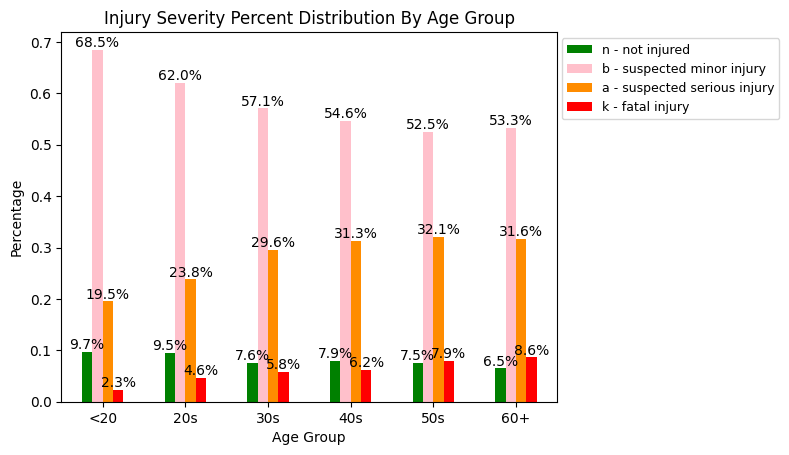

In [6]:
# Get the visual of the motorcyclist's age and injury
# severity distribution
w.get_age_visual()

In [7]:
# Get the chi2_contingency tests for motorcyclist age
w.get_age_stattest()

========== ACCEPT NULL HYPOTHESIS ==========
Age Range: 30s
Injury: 1
Statistic: 1.7690344188685856
P-Value: 0.18350162245742066

========== ACCEPT NULL HYPOTHESIS ==========
Age Range: 30s
Injury: 0
Statistic: 1.7690344188685854
P-Value: 0.1835016224574207

========== REJECT NULL HYPOTHESIS ==========
Age Range: 20s
Injury: 1
Statistic: 13.950600959071485
P-Value: 0.0001876776498812034

========== REJECT NULL HYPOTHESIS ==========
Age Range: 20s
Injury: 0
Statistic: 13.950600959071487
P-Value: 0.00018767764988120327

========== ACCEPT NULL HYPOTHESIS ==========
Age Range: <20
Injury: 1
Statistic: 1.9382624994166442
P-Value: 0.1638573134420157

========== ACCEPT NULL HYPOTHESIS ==========
Age Range: <20
Injury: 0
Statistic: 1.9382624994166442
P-Value: 0.1638573134420157

========== ACCEPT NULL HYPOTHESIS ==========
Age Range: 40s
Injury: 1
Statistic: 0.26599402896997026
P-Value: 0.6060317596251912

========== ACCEPT NULL HYPOTHESIS ==========
Age Range: 40s
Injury: 0
Statistic: 0.26599

<b><i>
    REJECT NULL HYPOTHESIS - FOR 20s and 60+!
</i></b>

The age group of the motorcyclist does make a significant difference in the injury severity of single motorcycle crashes in Texas.

- AGE // REJECT VALUES
    - 20s // 1, 0
    - 60+ // 1, 0
    
<b><i>
    TAKEAWAY :
</i></b>

As age increases, so does the rate of fatal and serious injuries whereas minor and no injury decrease.

---

<h3><b><i>
    Motorcyclist's Ethnicity
</i></b></h3>

<b>H$_0$:</b> The ethnicity of the motorcyclist does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

<b>H$_a$:</b> The ethnicity of the motorcyclist does make a significant difference in the injury severity of single motorcycle crashes in Texas.

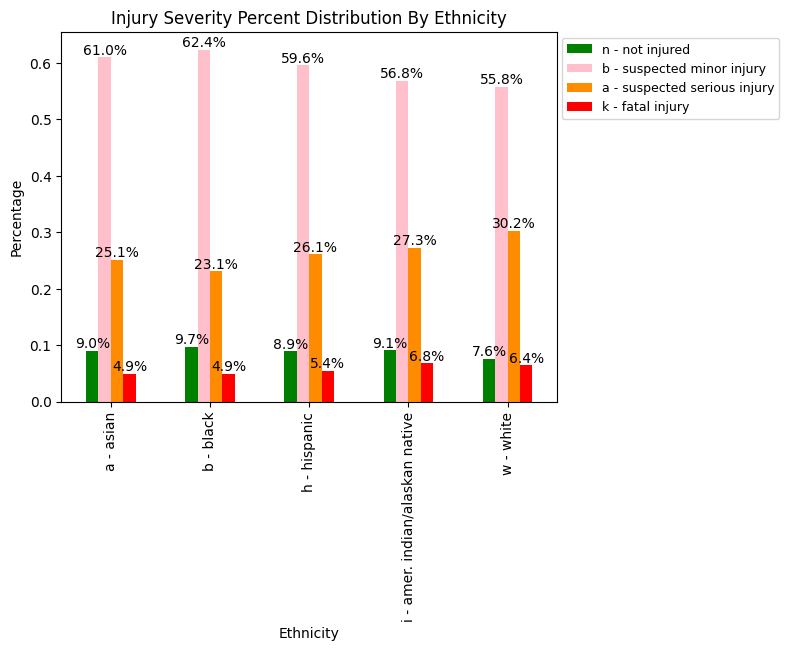

In [8]:
# Get the visual of the motorcyclist's ethnicity and injury
# severity distribution
w.get_ethnicity_visual()

In [9]:
# Get the chi2_contingency tests for motorcyclist ethnicity
w.get_ethnicity_stattest()

========== REJECT NULL HYPOTHESIS ==========
Ethnicity: w - white
Injury: 1
Statistic: 12.921227847188085
P-Value: 0.0003248766846379219

========== REJECT NULL HYPOTHESIS ==========
Ethnicity: w - white
Injury: 0
Statistic: 12.921227847188085
P-Value: 0.0003248766846379219

========== ACCEPT NULL HYPOTHESIS ==========
Ethnicity: h - hispanic
Injury: 1
Statistic: 2.502870101394623
P-Value: 0.11363902962556253

========== ACCEPT NULL HYPOTHESIS ==========
Ethnicity: h - hispanic
Injury: 0
Statistic: 2.502870101394623
P-Value: 0.11363902962556253

========== REJECT NULL HYPOTHESIS ==========
Ethnicity: b - black
Injury: 1
Statistic: 5.299761599477749
P-Value: 0.021328343326624272

========== REJECT NULL HYPOTHESIS ==========
Ethnicity: b - black
Injury: 0
Statistic: 5.299761599477749
P-Value: 0.021328343326624272

========== ACCEPT NULL HYPOTHESIS ==========
Ethnicity: i - amer. indian/alaskan native
Injury: 1
Statistic: 0.0
P-Value: 1.0

========== ACCEPT NULL HYPOTHESIS ==========
Ethn

<b><i>
    REJECT NULL HYPOTHESIS - FOR BLACK AND WHITE!
</i></b>

The ethnicity of the motorcyclist does make a significant difference in the injury severity of single motorcycle crashes in Texas.

- ETHNICITY // REJECT VALUES
    - White // 1, 0
    - Black // 1, 0
        
<b><i>
    TAKEAWAY :
</i></b>

The distribution of the injury severity seems relatively similar across all ethnic groups +-5%.

---

<h3><b><i>
    Has Motorcycle Endorsement
</i></b></h3>

<b>H$_0$:</b> Whether or not the motorcyclist has a motorcycle endorsement does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

<b>H$_a$:</b> Whether or not the motorcyclist has a motorcycle endorsement does make a significant difference in the injury severity of single motorcycle crashes in Texas.

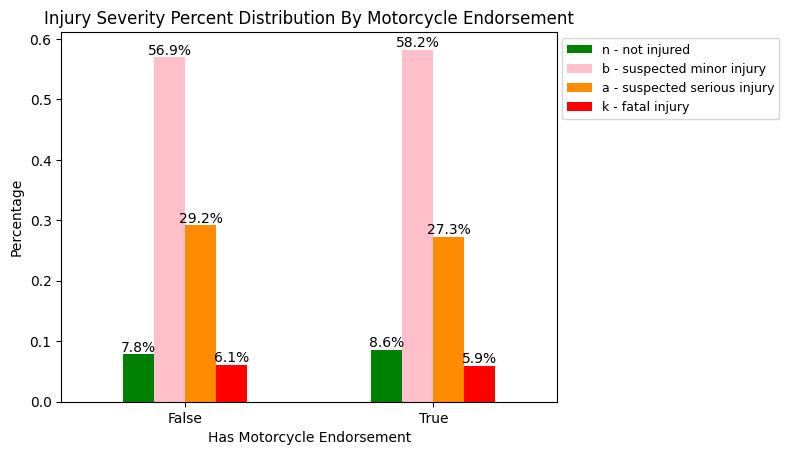

In [10]:
# Get the visual of whether or not the motorcyclist has
# a motorcycle endorsement and injury severity distribution
w.get_motorcycle_endorsement_visual()

In [11]:
# Get the chi2_contingency tests for whether or not the 
# motorcyclist has a motorcycle endorsement or not
w.get_motorcycle_endorsement_stattest()

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Endorsement: 0
Injury: 1
Statistic: 2.9319201148103025
P-Value: 0.08684414919099596

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Endorsement: 0
Injury: 0
Statistic: 2.9319201148103025
P-Value: 0.08684414919099596

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Endorsement: 1
Injury: 1
Statistic: 2.9319201148103025
P-Value: 0.08684414919099596

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Endorsement: 1
Injury: 0
Statistic: 2.9319201148103025
P-Value: 0.08684414919099596



<b><i>
    ACCEPT NULL HYPOTHESIS!
</i></b>

Whether or not the motorcyclist has a motorcycle endorsement does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

    
<b><i>
    TAKEAWAY :
</i></b>

Whether or not a motorcycle driver had a motorcycle endorsement doesn't show anything significant in relation to the level of injury severity.

---

<h3><b><i>
    Motorcycle Body Style
</i></b></h3>

<b>H$_0$:</b> The body style of the motorcycle does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

<b>H$_a$:</b> The body style of the motorcycle does make a significant difference in the injury severity of single motorcycle crashes in Texas.

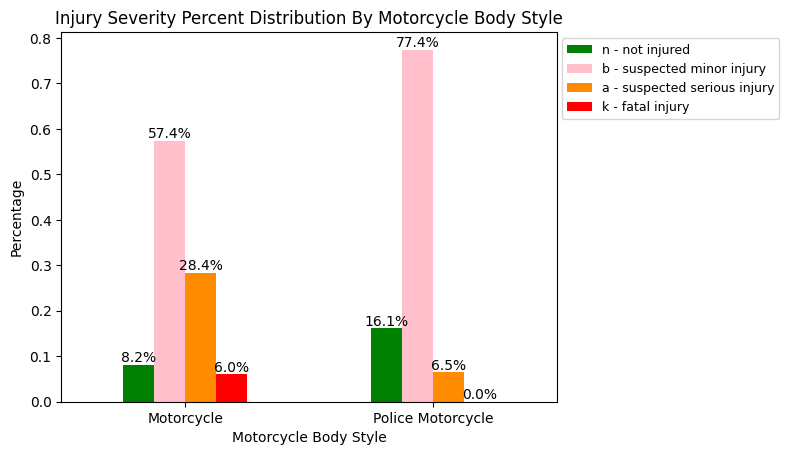

In [12]:
# Get the visual of the motorcycle's body style and injury
# severity distribution
w.get_motorcycle_body_style_visual()

In [13]:
# Get the chi2_contingency tests for the motorcycle's body style
w.get_motorcycle_body_style_stattest()

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Body Style: mc - motorcycle
Injury: 1
Statistic: 1.6664633689886195
P-Value: 0.1967329074072452

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Body Style: mc - motorcycle
Injury: 0
Statistic: 1.6664633689886195
P-Value: 0.1967329074072452

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Body Style: pm - police motorcycle
Injury: 1
Statistic: 1.6664633689886195
P-Value: 0.1967329074072452

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Body Style: pm - police motorcycle
Injury: 0
Statistic: 1.6664633689886195
P-Value: 0.1967329074072452



<b><i>
    ACCEPT NULL HYPOTHESIS!
</i></b>

The body style of the motorcycle does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

    
<b><i>
    TAKEAWAY :
</i></b>

Motorcyclists on a police motorcycle doesn't have any fatalities and a much lower rate of serious injury as compared to just motorcycles in general.

---

<h3><b><i>
    Motorcycle Color
</i></b></h3>

<b>H$_0$:</b> The color of the motorcycle does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

<b>H$_a$:</b> The color of the motorcycle does make a significant difference in the injury severity of single motorcycle crashes in Texas.

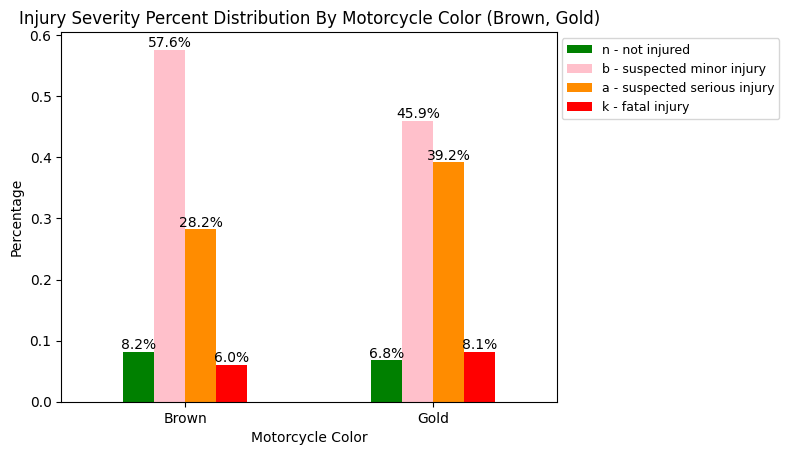

In [14]:
# Get the visual of the motorcycle's color and injury
# severity distribution
w.get_motorcycle_color_visual()

In [15]:
# Get the chi2_contingency tests for the motorcycle's color
w.get_motorcycle_color_stattest()

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Color: blu - blue
Injury: 1
Statistic: 0.288639138728697
P-Value: 0.5910939247405596

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Color: blu - blue
Injury: 0
Statistic: 0.288639138728697
P-Value: 0.5910939247405596

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Color: gry - gray
Injury: 1
Statistic: 0.6166268814406752
P-Value: 0.4323035267557743

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Color: gry - gray
Injury: 0
Statistic: 0.6166268814406753
P-Value: 0.4323035267557743

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Color: blk - black
Injury: 1
Statistic: 2.592351391635051
P-Value: 0.10738081393268288

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Color: blk - black
Injury: 0
Statistic: 2.592351391635051
P-Value: 0.10738081393268288

========== ACCEPT NULL HYPOTHESIS ==========
Motorcycle Color: red - red
Injury: 1
Statistic: 0.1604229434336283
P-Value: 0.6887674213098465



<b><i>
    ACCEPT NULL HYPOTHESIS!
</i></b>

The color of the motorcycle does not make a significant difference in the injury severity of single motorcycle crashes in Texas.
    
<b><i>
    TAKEAWAY :
</i></b>

Overall, all colors of motorcycles seem to be distributed evenly across level of injury severity.

---

<h3><b><i>
    Motorcycle Make Country
</i></b></h3>

<b>H$_0$:</b> The make country of the motorcycle does not make a significant difference in the injury severity of single motorcycle crashes in Texas.

<b>H$_a$:</b> The make country of the motorcycle does make a significant difference in the injury severity of single motorcycle crashes in Texas.

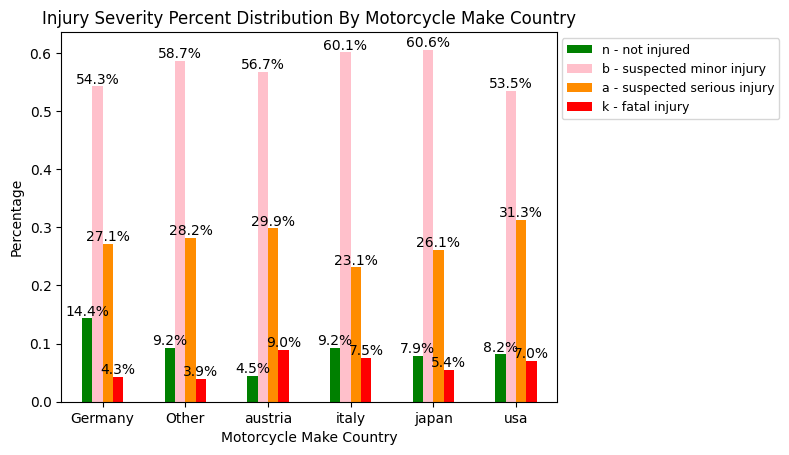

In [16]:
# Get the visual of the motorcycle's make country and injury
# severity distribution
w.get_motorcycle_make_country_visual()

In [17]:
# Get the chi2_contingency tests for the motorcycle's make country
w.get_motorcycle_make_country_stattest()

========== ACCEPT NULL HYPOTHESIS ==========
Make Country: usa
Injury: 1
Statistic: 0.0001147099851115574
P-Value: 0.9914546005131627

========== ACCEPT NULL HYPOTHESIS ==========
Make Country: usa
Injury: 0
Statistic: 0.00011470998511155741
P-Value: 0.9914546005131627

========== ACCEPT NULL HYPOTHESIS ==========
Make Country: japan
Injury: 1
Statistic: 1.5080002880181704
P-Value: 0.21944447841886616

========== ACCEPT NULL HYPOTHESIS ==========
Make Country: japan
Injury: 0
Statistic: 1.5080002880181707
P-Value: 0.2194444784188662

========== ACCEPT NULL HYPOTHESIS ==========
Make Country: Other
Injury: 1
Statistic: 1.378007251503984
P-Value: 0.24044087670206332

========== ACCEPT NULL HYPOTHESIS ==========
Make Country: Other
Injury: 0
Statistic: 1.378007251503984
P-Value: 0.24044087670206332

========== REJECT NULL HYPOTHESIS ==========
Make Country: Germany
Injury: 1
Statistic: 8.910550092260186
P-Value: 0.0028352784579413373

========== REJECT NULL HYPOTHESIS ==========
Make Coun

<b><i>
    REJECT NULL HYPOTHESIS - ONLY GERMANY!
</i></b>

The make country of the motorcycle does make a significant difference in the injury severity of single motorcycle crashes in Texas.

    
<b><i>
    TAKEAWAY :
</i></b>

German motorcycles have the highest ratio of uninjured motorcyclists (14.4%) whereas austrian motorcycles have the highest ratio of fatally injured motorcyclists (9.0%).

---

## Modeling

The modeling stage involved building and evaluating several machine learning models to predict the severity of injuries in motorcycle crashes. The models used included:

- Logistic Regression
- Decision Tree
- Random Forest
- Gradient Boosting

Each model was evaluated using cross-validation and the area under the receiver operating characteristic (ROC) curve (AUC-ROC). The model with the highest AUC-ROC was selected as the final model.

## Conclusion

The analysis of the Tex Wrex dataset provided valuable insights into the factors contributing to motorcycle crashes and the severity of injuries sustained in these crashes. The predictive model built as part of this analysis can be used to predict the severity of injuries in future crashes, which can help in planning emergency response and in designing interventions to reduce the severity of injuries in motorcycle crashes.